In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np

In [0]:
data = pd.read_csv('/content/drive/My Drive/training.csv')

In [6]:
data.head()

,segment_id,wellbore_chev_no_id,area_id,formation_id,bit_model_id,drillbit_size,min_depth,max_depth,rate_of_penetration,surface_weight_on_bit,surface_rpm
0,wellbore_chev_no_0_727,wellbore_chev_no_0,area_0,formation_62,bit_model_1,12.25,21834.5,21839.5,99.614650,43.533280,150.369091
1,wellbore_chev_no_0_728,wellbore_chev_no_0,area_0,formation_61,bit_model_1,12.25,21840.0,21869.5,99.354021,42.382033,150.369001
2,wellbore_chev_no_0_729,wellbore_chev_no_0,area_0,formation_59,bit_model_1,12.25,21870.0,21899.5,83.622907,48.675129,150.429335
3,wellbore_chev_no_0_730,wellbore_chev_no_0,area_0,formation_65,bit_model_1,12.25,21900.0,21929.5,85.427731,30.041290,150.080000
4,wellbore_chev_no_0_731,wellbore_chev_no_0,area_0,formation_65,bit_model_1,12.25,21930.0,21959.5,100.639811,31.406319,150.032167


In [0]:
wellbores = data.wellbore_chev_no_id.unique()
area = data.area_id.unique()
formation = data.formation_id.unique()
bitmodel = data.bit_model_id.unique()
wellbore_dict = dict(zip(wellbores, range(len(wellbores))))
area_dict = dict(zip(area, range(len(area))))
formation_dict = dict(zip(formation, range(len(formation))))
bitmodel_dict = dict(zip(bitmodel, range(len(bitmodel))))

In [0]:
wellbores_col = data.wellbore_chev_no_id

In [0]:
wellbores_col = wellbores_col.map(wellbore_dict)

In [0]:
data.wellbore_chev_no_id = wellbores_col

In [0]:
area_col = data.area_id

In [0]:
area_col = area_col.map(area_dict)

In [0]:
data.area_id = area_col

In [0]:
formation_col = data.formation_id
formation_col = formation_col.map(formation_dict)
data.formation_id = formation_col

In [0]:
bit_col = data.bit_model_id
bit_col = bit_col.map(bitmodel_dict)
data.bit_model_id = bit_col

In [0]:
data['ratio1'] = data.surface_rpm * data.surface_weight_on_bit
data['ratio2'] = data.surface_weight_on_bit / data.drillbit_size
data['ratio3'] = data.min_depth / data.drillbit_size
data['ratio4'] = np.pi*((data.drillbit_size)/2)**2

In [17]:
data.head()

,segment_id,wellbore_chev_no_id,area_id,formation_id,bit_model_id,drillbit_size,min_depth,max_depth,rate_of_penetration,surface_weight_on_bit,surface_rpm,ratio1,ratio2,ratio3,ratio4
0,wellbore_chev_no_0_727,0,0,0,0,12.25,21834.5,21839.5,99.614650,43.533280,150.369091,6546.059694,3.553737,1782.408163,117.858812
1,wellbore_chev_no_0_728,0,0,1,0,12.25,21840.0,21869.5,99.354021,42.382033,150.369001,6372.943939,3.459758,1782.857143,117.858812
2,wellbore_chev_no_0_729,0,0,2,0,12.25,21870.0,21899.5,83.622907,48.675129,150.429335,7322.167196,3.973480,1785.306122,117.858812
3,wellbore_chev_no_0_730,0,0,3,0,12.25,21900.0,21929.5,85.427731,30.041290,150.080000,4508.596850,2.452350,1787.755102,117.858812
4,wellbore_chev_no_0_731,0,0,3,0,12.25,21930.0,21959.5,100.639811,31.406319,150.032167,4711.958130,2.563781,1790.204082,117.858812


In [0]:
# data = pd.read_csv('/Users/kunal/Downloads/filesForStartOfDatathon/numerical_chevron_data.csv')

In [19]:
data[data.columns[1:]].corr()['rate_of_penetration'][:]

wellbore_chev_no_id     -0.060850
area_id                 -0.005844
formation_id            -0.191339
bit_model_id            -0.121953
drillbit_size            0.309222
min_depth               -0.402306
max_depth               -0.402290
rate_of_penetration      1.000000
surface_weight_on_bit    0.508618
surface_rpm              0.611703
ratio1                   0.643477
ratio2                   0.317429
ratio3                  -0.451866
ratio4                   0.247433
Name: rate_of_penetration, dtype: float64

In [0]:
# data.to_csv('/Users/kunal/Downloads/filesForStartOfDatathon/new_data_ratios.csv')

In [0]:
from sklearn.datasets import load_breast_cancer, load_diabetes, load_wine
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
from sklearn.linear_model import ElasticNet
from sklearn.datasets import make_regression

In [0]:
from sklearn.preprocessing import StandardScaler

In [49]:
data.head()

,segment_id,wellbore_chev_no_id,area_id,formation_id,bit_model_id,drillbit_size,min_depth,max_depth,rate_of_penetration,surface_weight_on_bit,surface_rpm,ratio1,ratio2,ratio3,ratio4
0,wellbore_chev_no_0_727,0,0,0,0,12.25,21834.5,21839.5,99.614650,43.533280,150.369091,6546.059694,3.553737,1782.408163,117.858812
1,wellbore_chev_no_0_728,0,0,1,0,12.25,21840.0,21869.5,99.354021,42.382033,150.369001,6372.943939,3.459758,1782.857143,117.858812
2,wellbore_chev_no_0_729,0,0,2,0,12.25,21870.0,21899.5,83.622907,48.675129,150.429335,7322.167196,3.973480,1785.306122,117.858812
3,wellbore_chev_no_0_730,0,0,3,0,12.25,21900.0,21929.5,85.427731,30.041290,150.080000,4508.596850,2.452350,1787.755102,117.858812
4,wellbore_chev_no_0_731,0,0,3,0,12.25,21930.0,21959.5,100.639811,31.406319,150.032167,4711.958130,2.563781,1790.204082,117.858812


In [0]:
data1 = data.drop(columns=['segment_id'])

In [0]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data1)

In [0]:
y = data1.rate_of_penetration

In [0]:
X = data1.drop(columns=['rate_of_penetration'])
# ','min_depth','max_depth'

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [56]:
X, y = make_regression(n_features= 2, random_state=0)
regr = ElasticNet(random_state=0, tol = 0.1)
regr.fit(X_train, y_train)

ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=0, selection='cyclic', tol=0.1, warm_start=False)

In [28]:
# xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)
xgbr = xgb.XGBRegressor() 
XGBRegressor(base_score=0.8, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.2, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=350,
       n_jobs=1, nthread=None, objective='reg:squarederror', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)



XGBRegressor(base_score=0.8, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.2, max_delta_step=0,
             max_depth=7, min_child_weight=1, missing=None, n_estimators=350,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [29]:
xgbr.fit(X_train, y_train)

y_pred = xgbr.predict(X_test)

mse=mean_squared_error(y_test, y_pred)

print(np.sqrt(mse))

/usr/local/lib/python3.6/dist-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[18:26:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
25.011917973781546


In [30]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [101]:
# model = Sequential()
# # model.add(Dense(input_dim = 13, units = 10, activation='relu', kernel_initializer='uniform'))
# # model.add(Dense(units = 20, activation='relu', kernel_initializer='uniform'))
# # model.add(Dense(units = 1, activation='sigmoid', kernel_initializer='uniform'))
# # model.compile(optimizer='adam', loss='MSE', metrics=['accuracy'])
# model.add(Dense(13, input_dim=13, kernel_initializer='normal', activation='relu'))
# model.add(Dense(6, kernel_initializer='normal', activation='relu'))
# model.add(Dense(1, kernel_initializer='normal'))
# # Compile model
# model.compile(metrics = ['accuracy'],loss='mean_squared_error', optimizer='adam')
from keras import Sequential
from keras.layers import Dense
# def build_regressor():
#     regressor = Sequential()
#     regressor.add(Dense(units=13, input_dim=13))
#     regressor.add(Dense(units=1))
#     regressor.compile(optimizer='adam', loss='mean_squared_error',  metrics=['mae','accuracy'])
#     return regressor
# from keras.wrappers.scikit_learn import KerasRegressor
# regressor = KerasRegressor(build_fn=build_regressor, batch_size=800,epochs=100)

# model = Sequential()
# model.add(Dense(12, input_dim=13, kernel_initializer='normal', activation='relu'))
# model.add(Dense(8, activation='relu'))
# model.add(Dense(1, activation='linear'))
# model.summary()
# model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(32, kernel_initializer='normal',input_dim = 13, activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(64, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
NN_model.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_56 (Dense)             (None, 32)                448       
_________________________________________________________________
dense_57 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_58 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_59 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 65        
Total params: 10,945
Trainable params: 10,945
Non-trainable params: 0
_________________________________________________________________


In [0]:
results=NN_model.fit(X_train,y_train, batch_size=500, epochs=200, validation_split=0.2)
#500, 200

In [0]:
y_pred= regressor.predict(X_test)

In [0]:
import matplotlib.pyplot as plt

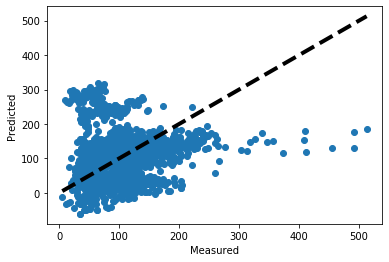

In [85]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [86]:
y_pred

array([161.51736,  92.11263,  78.19916, ..., 100.3319 , 124.29093,
        92.56409], dtype=float32)

In [87]:
y_test

3238    227.103109
3706     78.116084
435      55.749590
5659     46.947824
3418    163.160333
           ...    
6333    116.629305
485      19.127295
6588    171.299000
5896    118.252494
30       72.587343
Name: rate_of_penetration, Length: 2052, dtype: float64

In [0]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rms = sqrt(mean_squared_error(y_test, y_pred))

In [91]:
print(rms)

78.1596761875041
